In [2]:
from keras import layers, models

Using TensorFlow backend.


In [8]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [6]:
from keras import datasets
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train, num_classes=10)
    Y_test = np_utils.to_categorical(y_test, num_classes=10)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)
    
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)

In [11]:
Nin = 784
Nh = 100
Nout = 10

model = ANN_seq_func(Nin, Nh, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

In [13]:
history = model.fit(X_train, Y_train, epochs=15,
                    batch_size=100, validation_split=0.2, verbose=2)
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print("Test Loss and Accuracy: ", performace_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 1s - loss: 0.0162 - acc: 0.9967 - val_loss: 0.0928 - val_acc: 0.9749
Epoch 2/15
 - 1s - loss: 0.0143 - acc: 0.9971 - val_loss: 0.0928 - val_acc: 0.9762
Epoch 3/15
 - 1s - loss: 0.0119 - acc: 0.9977 - val_loss: 0.0972 - val_acc: 0.9739
Epoch 4/15
 - 1s - loss: 0.0105 - acc: 0.9982 - val_loss: 0.0945 - val_acc: 0.9753
Epoch 5/15
 - 1s - loss: 0.0095 - acc: 0.9983 - val_loss: 0.0936 - val_acc: 0.9760
Epoch 6/15
 - 1s - loss: 0.0082 - acc: 0.9986 - val_loss: 0.0965 - val_acc: 0.9757
Epoch 7/15
 - 1s - loss: 0.0088 - acc: 0.9983 - val_loss: 0.1070 - val_acc: 0.9738
Epoch 8/15
 - 1s - loss: 0.0062 - acc: 0.9990 - val_loss: 0.1022 - val_acc: 0.9737
Epoch 9/15
 - 1s - loss: 0.0059 - acc: 0.9991 - val_loss: 0.1024 - val_acc: 0.9759
Epoch 10/15
 - 1s - loss: 0.0039 - acc: 0.9997 - val_loss: 0.1105 - val_acc: 0.9738
Epoch 11/15
 - 1s - loss: 0.0039 - acc: 0.9995 - val_loss: 0.1039 - val_acc: 0.9759
Epoch 12/15
 - 1s - loss: 0.0030 - 

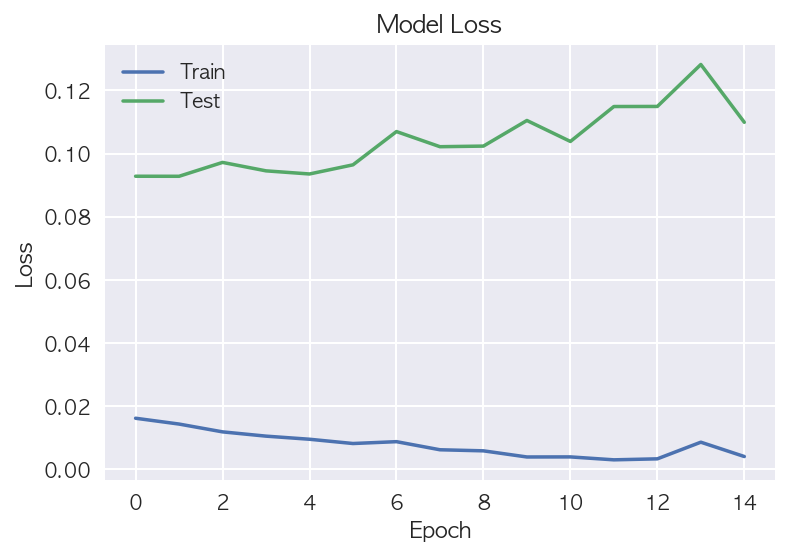

In [14]:
plot_loss(history)
plt.show()

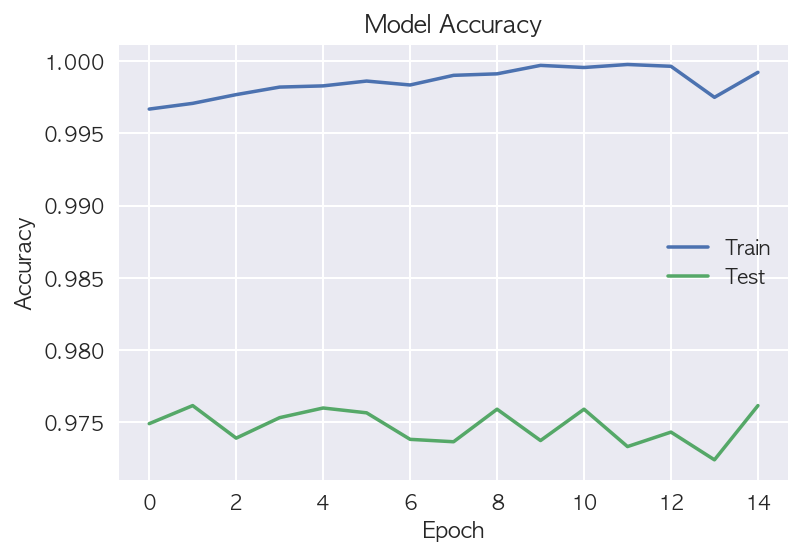

In [15]:
plot_acc(history)
plt.show()